### Phase 1 fully documented 

In [1]:
#import all the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read both the files and create dataframes
df_features=pd.read_csv('training_set_features.csv')
df_labels=pd.read_csv('training_set_labels.csv')

In [3]:
#join these df's
df = df_features.merge(df_labels, on='respondent_id')

In [4]:
#check what datatype each column is along with how many missing values there are.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df[['hhs_geo_region','census_msa']]

,hhs_geo_region,census_msa
0,oxchjgsf,Non-MSA
1,bhuqouqj,"MSA, Not Principle City"
2,qufhixun,"MSA, Not Principle City"
3,lrircsnp,"MSA, Principle City"
4,qufhixun,"MSA, Not Principle City"
...,...,...
26702,qufhixun,Non-MSA
26703,lzgpxyit,"MSA, Principle City"
26704,lzgpxyit,"MSA, Not Principle City"
26705,lrircsnp,Non-MSA


In [7]:
df.groupby('hhs_geo_region').count()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
hhs_geo_region,,,,,,,,,,,,,,,,,,,,,
atmpeygn,2033,2026,2022,2028,2021,2033,2030,2029,2030,2021,...,1957,1908,1952,2033,2024,2024,1042,1028,2033,2033
bhuqouqj,2846,2841,2836,2840,2828,2843,2842,2838,2839,2826,...,2713,2653,2709,2846,2829,2829,1546,1535,2846,2846
dqpwygqj,1126,1120,1122,1125,1105,1125,1124,1120,1122,1121,...,1041,1022,1044,1126,1104,1104,563,549,1126,1126
fpwskwrf,3265,3255,3247,3259,3237,3263,3259,3253,3250,3257,...,3076,2984,3070,3265,3229,3229,1671,1642,3265,3265
kbazzjca,2858,2848,2842,2847,2834,2857,2853,2848,2846,2846,...,2689,2602,2669,2858,2827,2827,1300,1295,2858,2858
lrircsnp,2078,2071,2068,2071,2062,2075,2073,2067,2072,2062,...,1972,1941,1969,2078,2057,2057,1072,1062,2078,2078
lzgpxyit,4297,4272,4276,4286,4272,4293,4286,4283,4276,4282,...,4025,3916,4011,4297,4240,4240,1939,1921,4297,4297
mlyzmhmf,2243,2230,2235,2235,2223,2241,2241,2237,2237,2233,...,2124,2068,2124,2243,2225,2225,1061,1043,2243,2243
oxchjgsf,2859,2852,2852,2847,2838,2857,2857,2855,2859,2848,...,2733,2664,2729,2859,2837,2837,1617,1604,2859,2859


### Data Cleaning

### 1) duplicate values
There are no duplicate values in the dataset so we dont need to worry about them

In [8]:
df.duplicated().sum()

0

### Handling Missing Values

In [9]:
#for numerical columns(int and float)

### First check the distribution

In [10]:
# we will drop health_insurance, employment_industry, employment_occupation for now as they have too many missing values

### Calculating percentage of missing values in top 3 missing columns
We will drop these for now as half of the values are missing.

In [11]:
df['health_insurance'].isna().sum()/len(df)

0.45957988542329725

In [12]:
df['employment_industry'].isna().sum()/len(df)

0.4991200808776725

In [13]:
df['employment_occupation'].isna().sum()/len(df)

0.5043621522447298

In [14]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### 2) Missing values for numerical column
The feature description tells us that all the numerical columns have either binary values or discrete positve integers, we will use mode as the method of imputing missing values

In [15]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [16]:
numerical_columns=['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc','household_adults','household_children']

In [17]:
#impute missing values with mode
for column in numerical_columns:
    
    if df[column].isnull().any():
        
        mode_val = df[column].mode()[0]
        df[column].fillna(mode_val, inplace=True)

### 3) Missing values for categorical column
We will again impute all the missing values according to the mode of that column for the categorical columns.

In [18]:
categ_columns=['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status','rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa','employment_industry','employment_occupation']

In [19]:
#df['marital_status'].value_counts()

In [20]:
for column in categ_columns:
    
    if df[column].isnull().any():
        
        mode_val = df[column].mode()[0]
        df[column].fillna(mode_val, inplace=True)

###### We have removed all the missing values for now.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

##### checking observations of each feature in df with each of the class labels(h1n1 and seasonal vaccine)

In [22]:
#define a plot method
def vaccination_rate_plot(col, target, data, ax=None):

    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

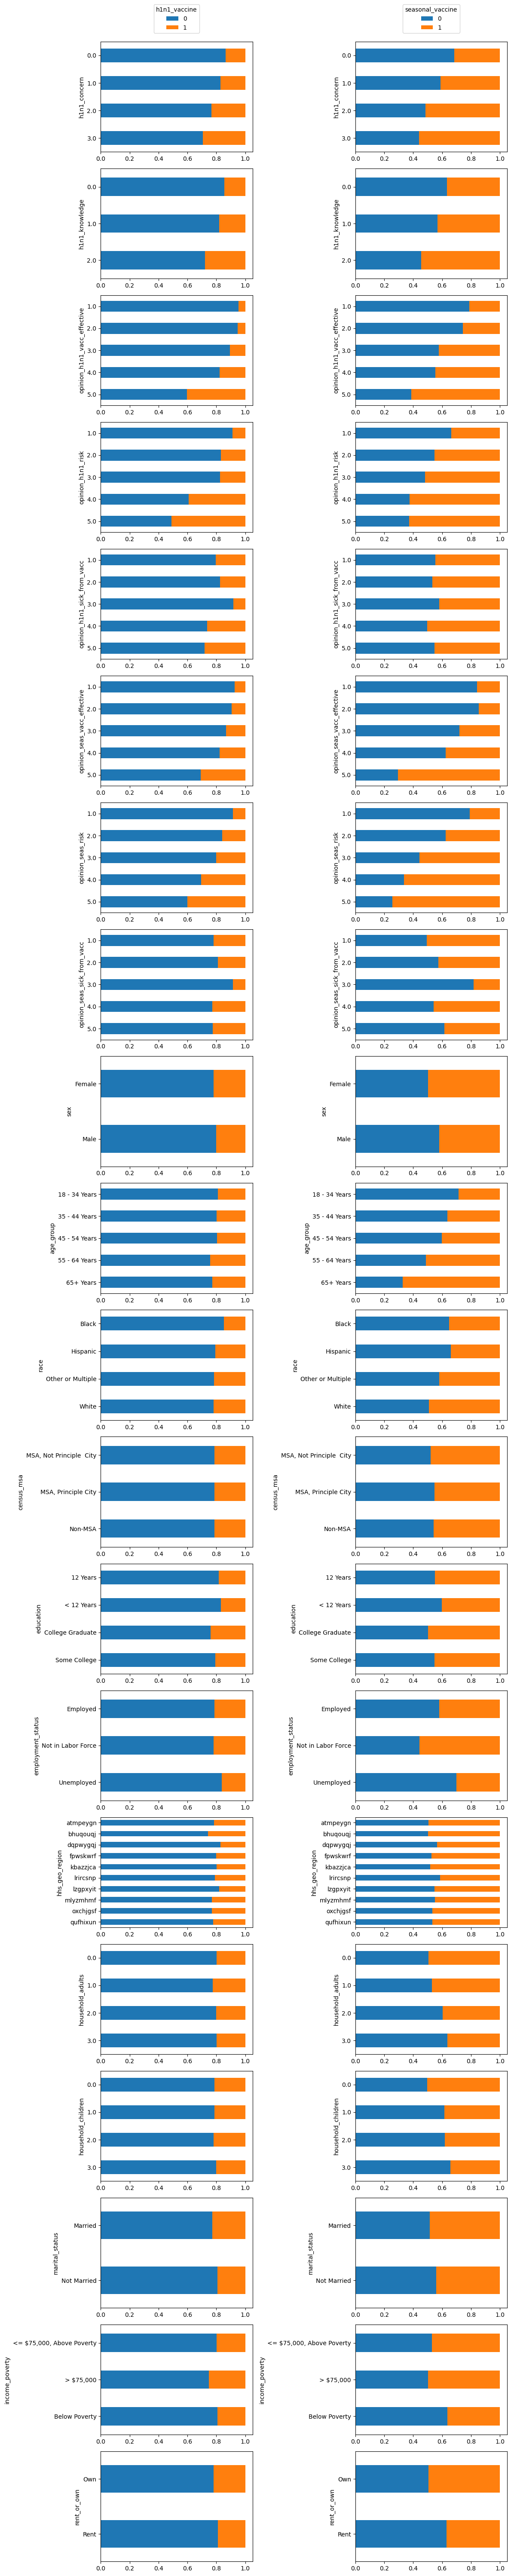

In [23]:
cols_to_plot = [
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',
    'census_msa',
    'education',
    'employment_status',
    'hhs_geo_region',
    'household_adults',
    'household_children',
    'marital_status',
    'income_poverty',
    'rent_or_own'
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(12,len(cols_to_plot)*3)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()

### 4) Outlier Detection using frequency analysis
In the features such as opinion_h1n1_sick_from_vacc and opinion_seas_sick_from_vacc where the person replied with 'Dont know' which in our dataset corresponds to 3.0 which is present very few times, but right now we cant delete the outliers as we have to gather more information about these features. For region, industry and occupation we will look after data cleaning.
We will keep the outliers and not delete them

In [24]:
#for categorical cols we will have to use some other technique than tradional like z-score.
#using visualization

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64


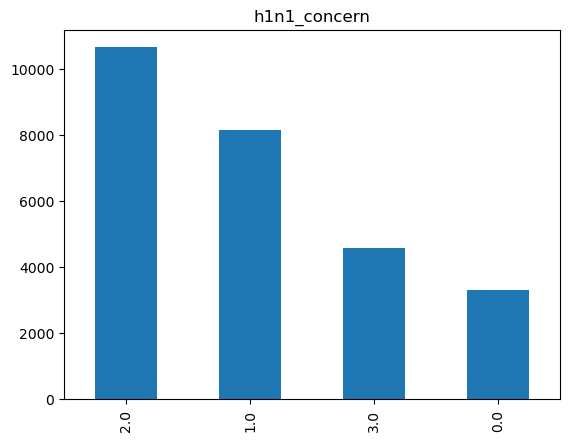

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64


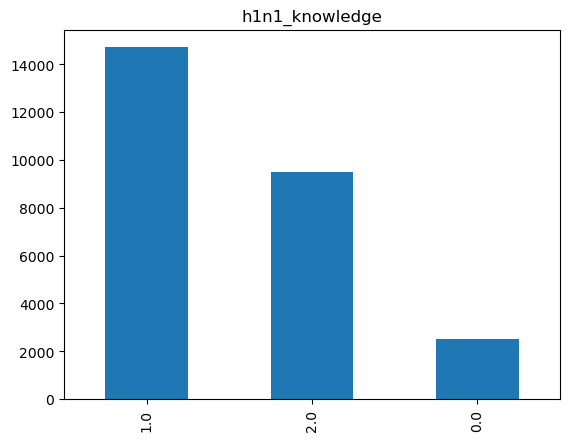

0.0    25406
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64


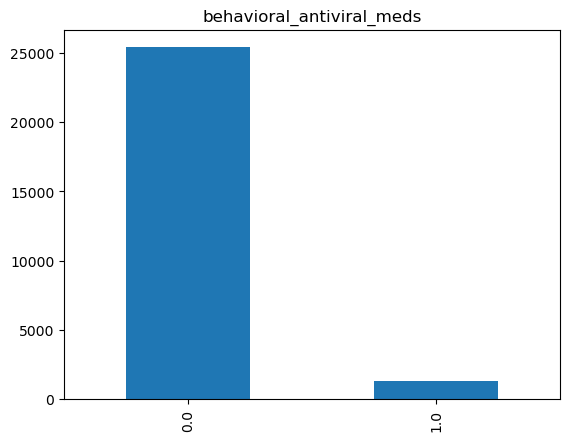

1.0    19436
0.0     7271
Name: behavioral_avoidance, dtype: int64


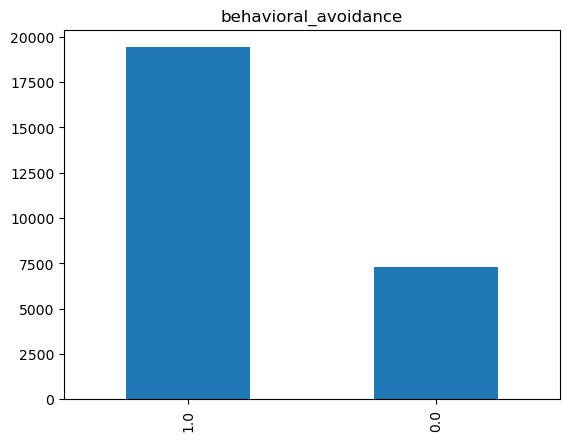

0.0    24866
1.0     1841
Name: behavioral_face_mask, dtype: int64


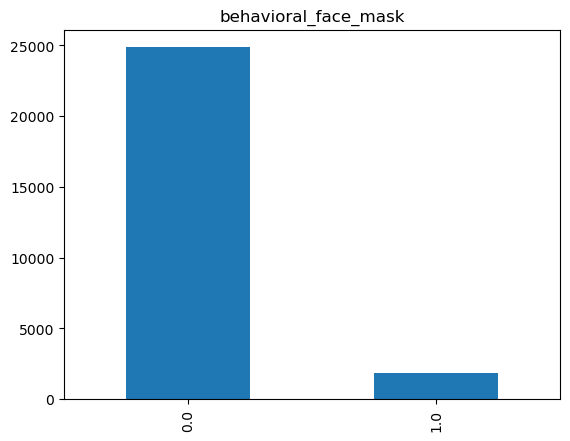

1.0    22057
0.0     4650
Name: behavioral_wash_hands, dtype: int64


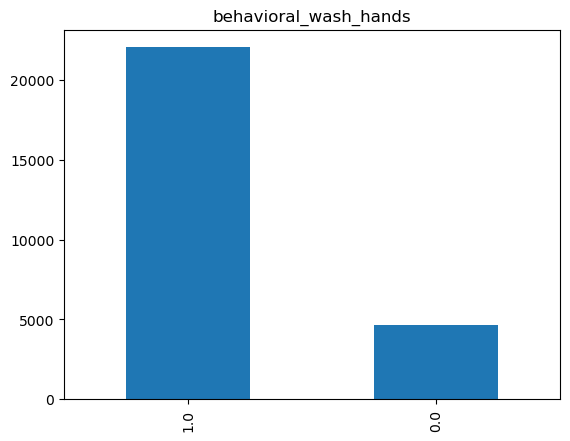

0.0    17160
1.0     9547
Name: behavioral_large_gatherings, dtype: int64


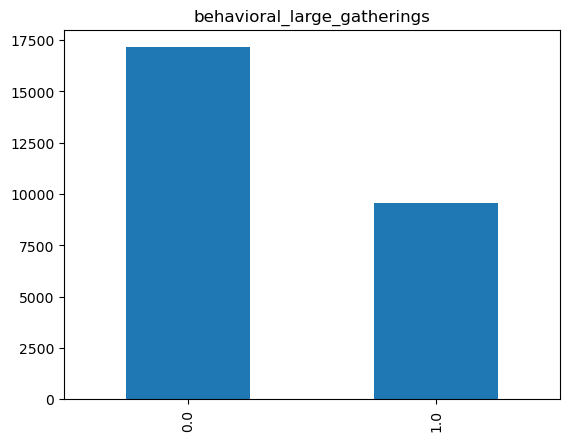

0.0    17726
1.0     8981
Name: behavioral_outside_home, dtype: int64


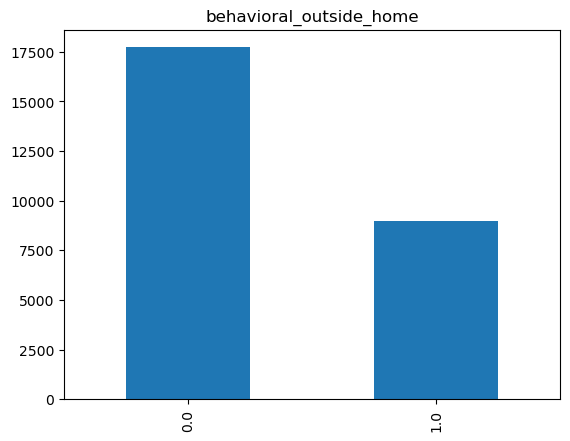

1.0    18129
0.0     8578
Name: behavioral_touch_face, dtype: int64


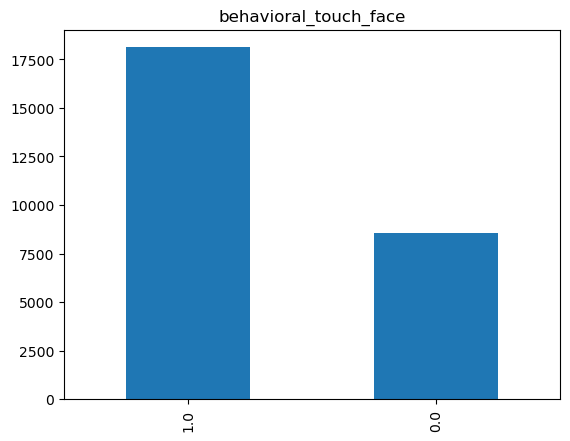

0.0    21299
1.0     5408
Name: doctor_recc_h1n1, dtype: int64


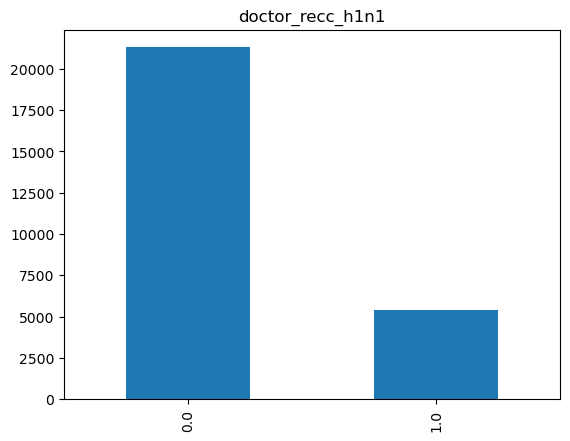

0.0    18613
1.0     8094
Name: doctor_recc_seasonal, dtype: int64


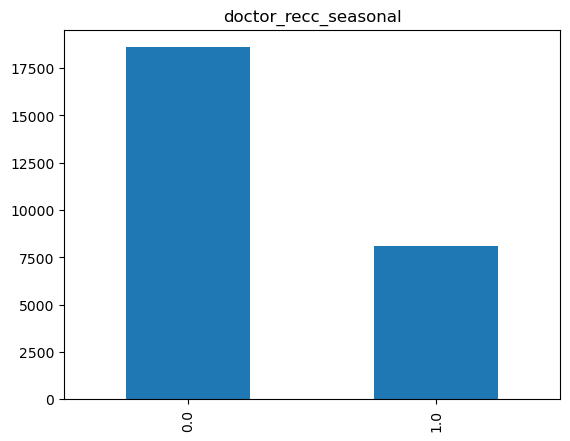

0.0    19417
1.0     7290
Name: chronic_med_condition, dtype: int64


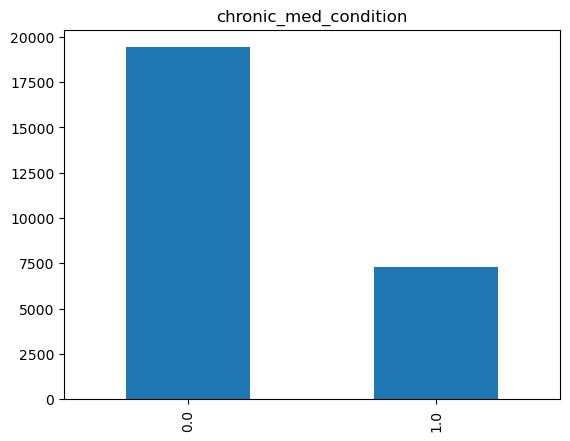

0.0    24569
1.0     2138
Name: child_under_6_months, dtype: int64


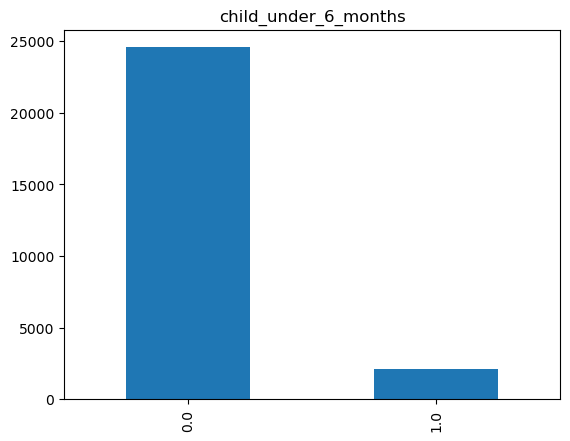

0.0    23808
1.0     2899
Name: health_worker, dtype: int64


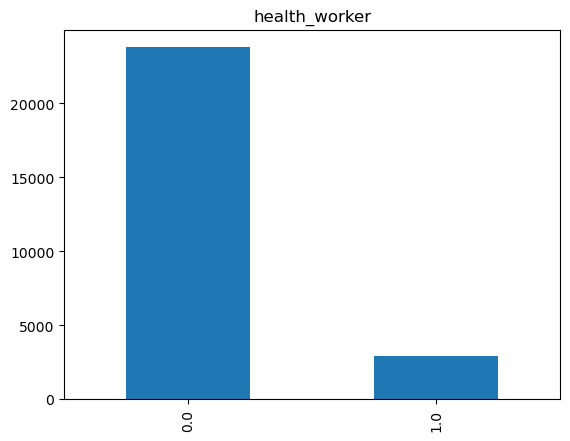

1.0    24971
0.0     1736
Name: health_insurance, dtype: int64


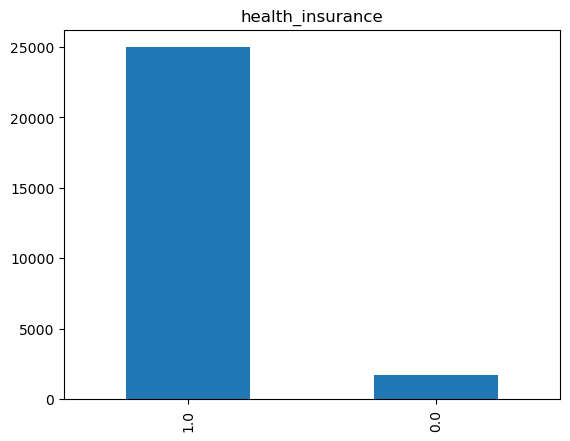

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: opinion_h1n1_vacc_effective, dtype: int64


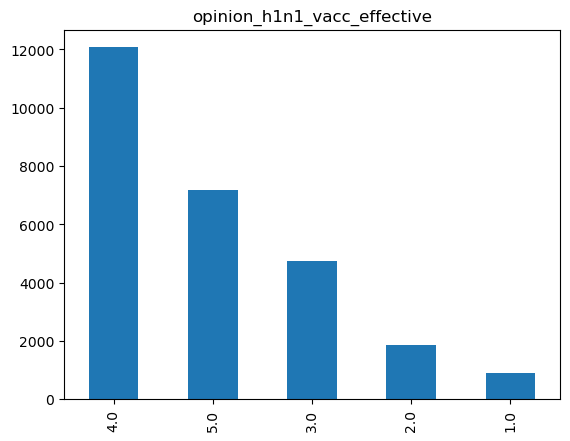

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: opinion_h1n1_risk, dtype: int64


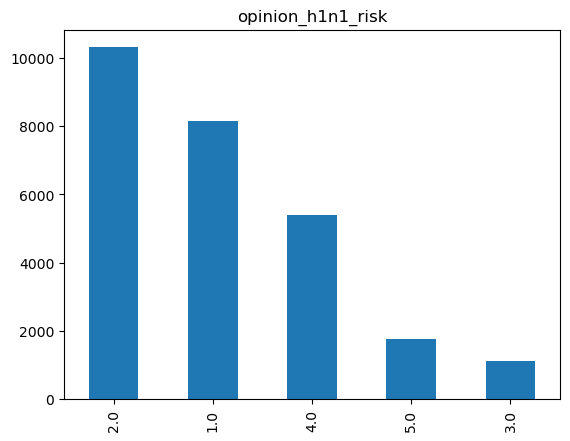

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: opinion_h1n1_sick_from_vacc, dtype: int64


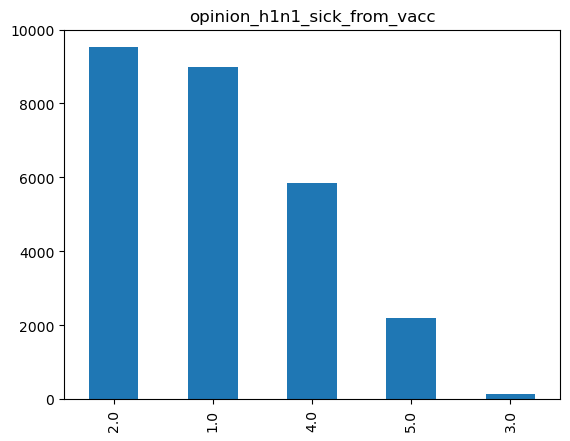

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64


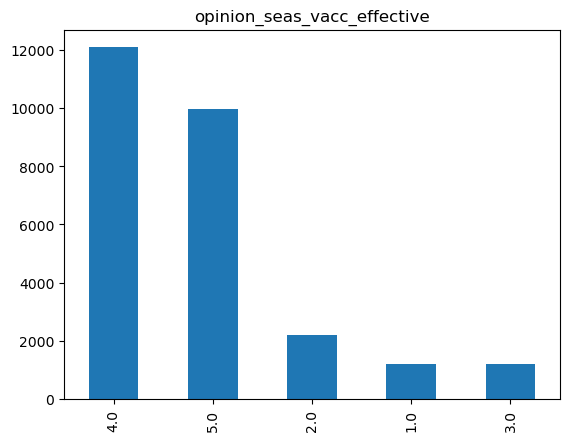

2.0    9468
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: opinion_seas_risk, dtype: int64


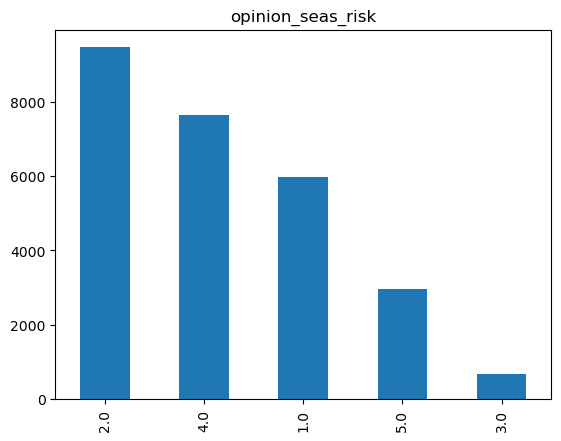

1.0    12407
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: opinion_seas_sick_from_vacc, dtype: int64


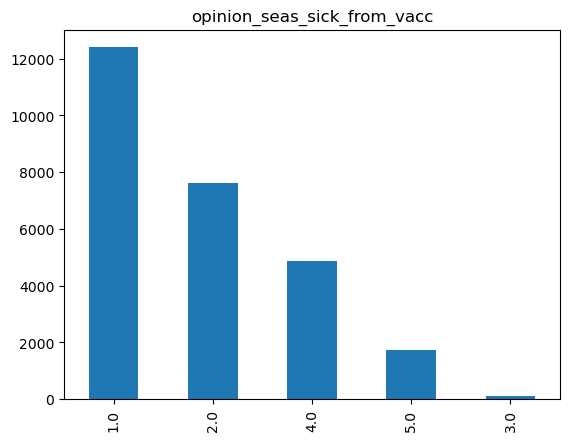

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64


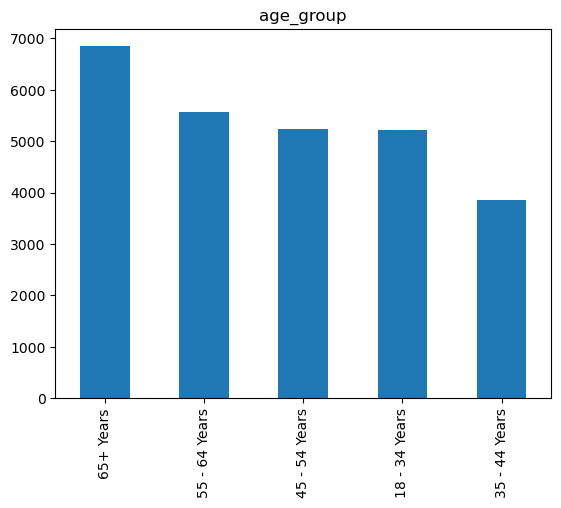

College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64


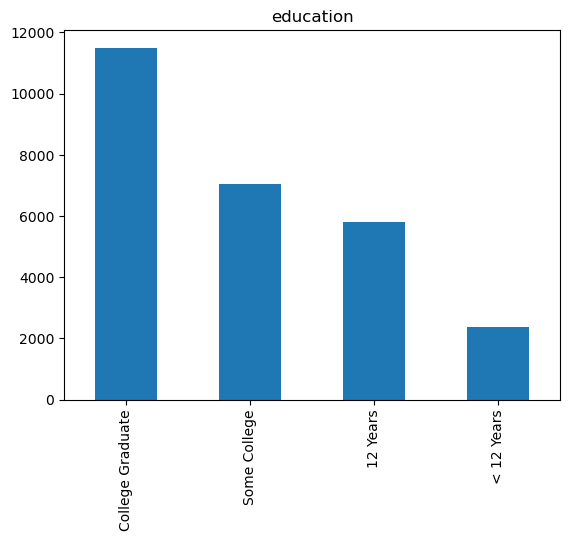

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64


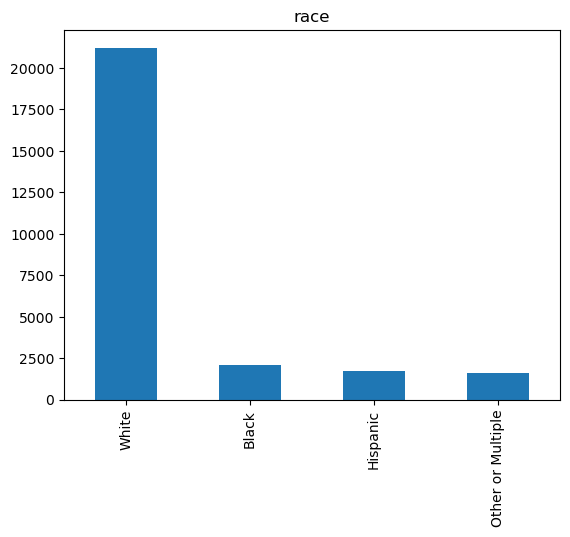

Female    15858
Male      10849
Name: sex, dtype: int64


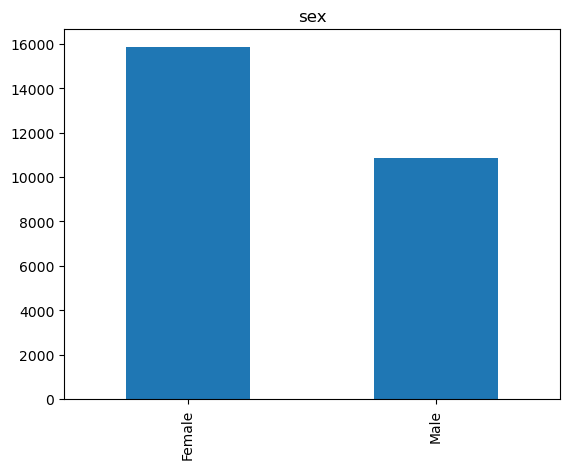

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64


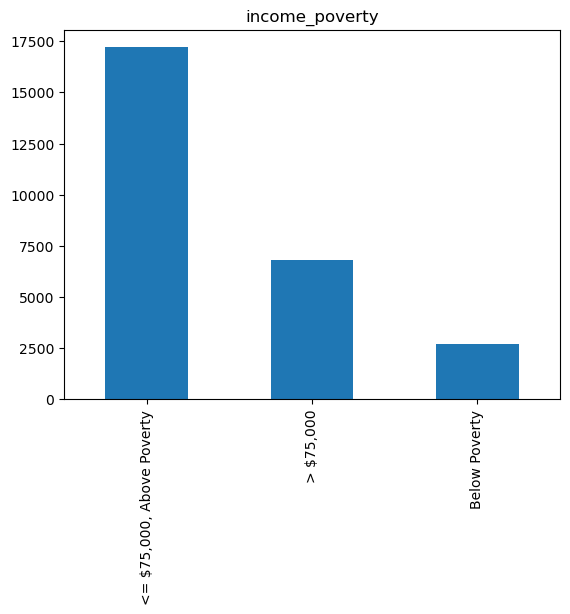

Married        14963
Not Married    11744
Name: marital_status, dtype: int64


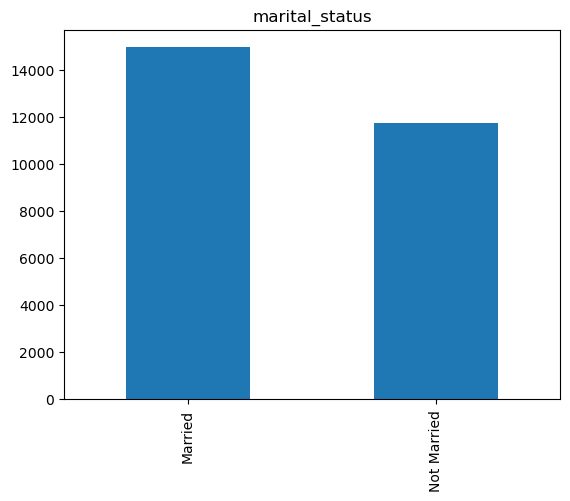

Own     20778
Rent     5929
Name: rent_or_own, dtype: int64


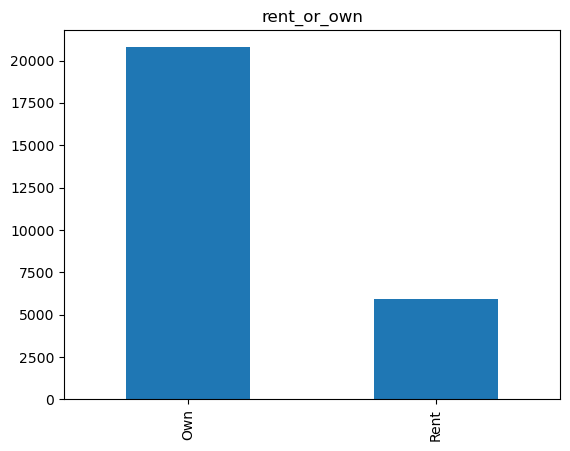

Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64


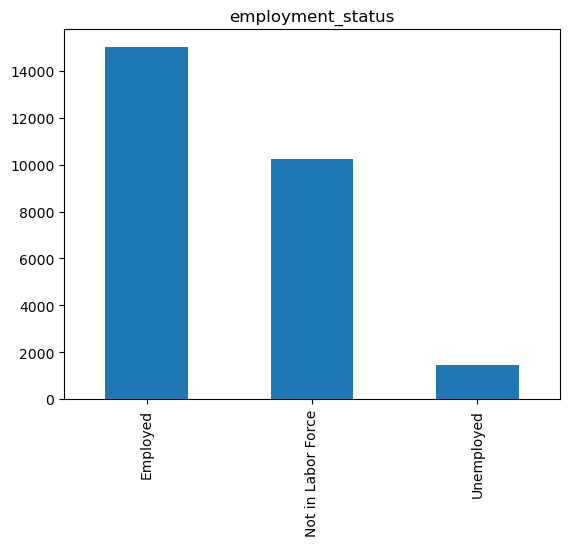

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64


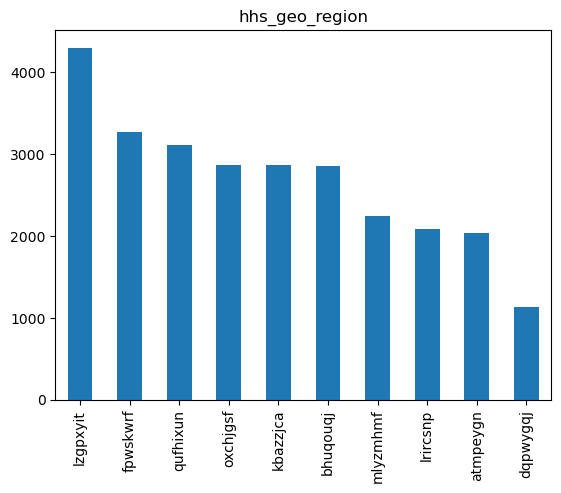

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64


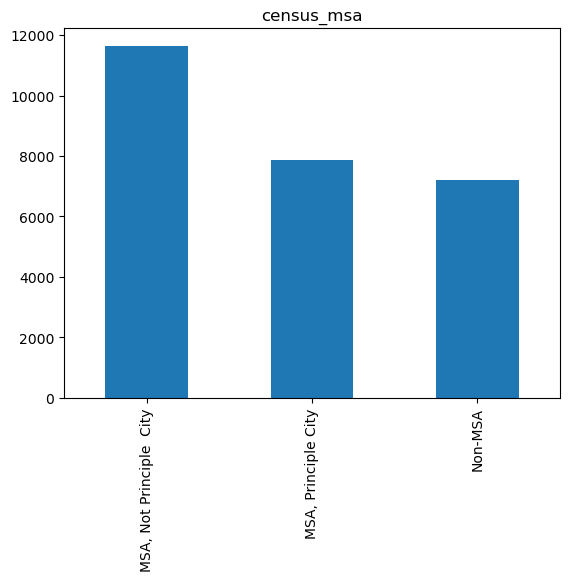

1.0    14723
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64


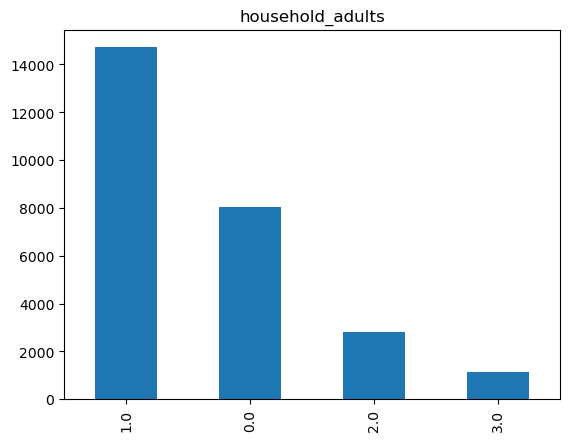

0.0    18921
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64


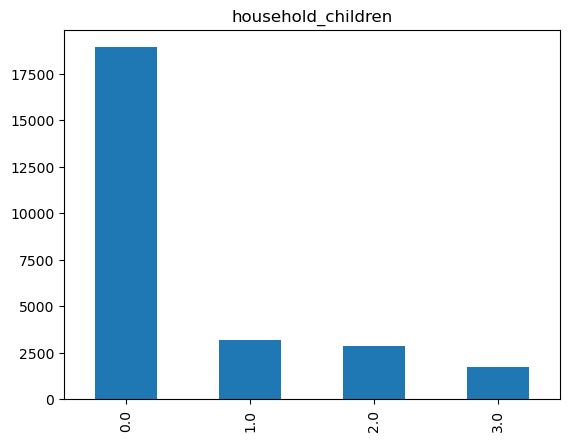

fcxhlnwr    15798
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64


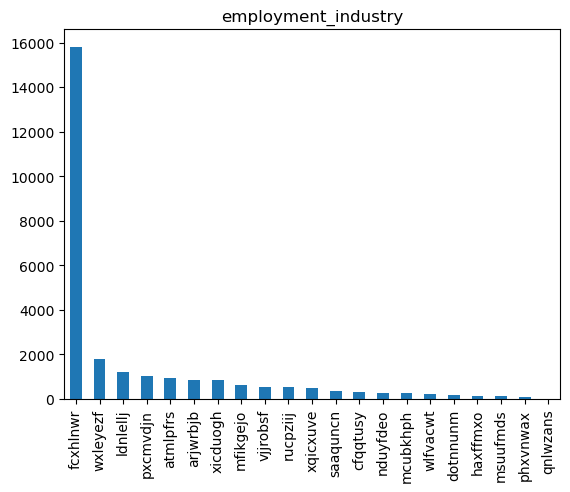

xtkaffoo    15248
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64


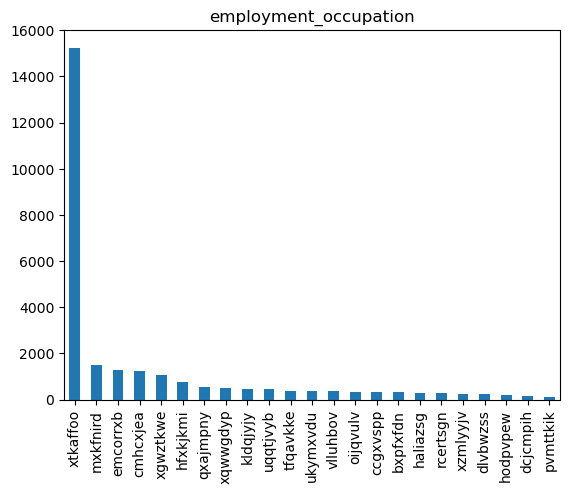

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


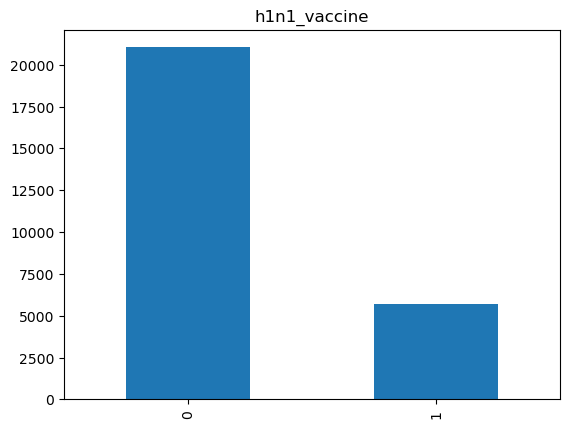

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


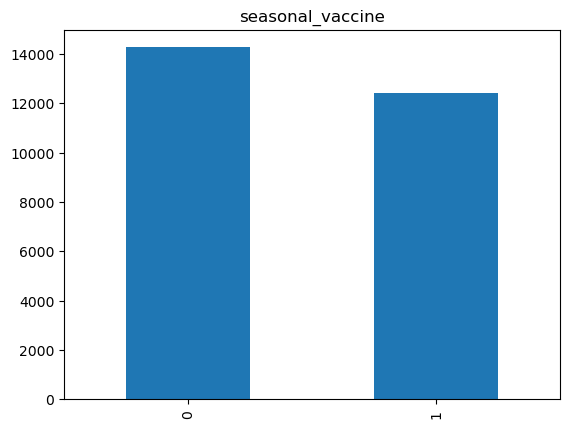

In [25]:
for column in df.columns[1:]:
    frequency = df[column].value_counts()
    print(frequency)
    frequency.plot(kind='bar', title=column)
    plt.show()


### Text data cleaning
We can see that for columns ['hhs_geo_region','employment_industry','employment_occupation'] the values are cryptic and random strings so we need to convert them into human readable strings and for better visualization interpretation.

In [26]:
df['hhs_geo_region'].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [27]:
df['employment_industry'].value_counts()

fcxhlnwr    15798
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [28]:
df['employment_occupation'].value_counts()

xtkaffoo    15248
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

### 5) Text data cleaning for region

In [29]:
regions=['lzgpxyit', 'fpwskwrf', 'qufhixun', 'oxchjgsf', 'kbazzjca', 'bhuqouqj',
       'mlyzmhmf', 'lrircsnp', 'atmpeygn', 'dqpwygqj']
region_dict={}
for i in range(10):
    region_dict[regions[i]]=f'region {i+1}'
    
def region_name(r):
    return region_dict[r]

In [30]:
df['hhs_geo_region_modified']=df['hhs_geo_region'].apply(region_name)

### 6) Text data cleaning for industry

In [31]:
df['employment_industry'].unique()

array(['fcxhlnwr', 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn',
       'xicduogh', 'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans'], dtype=object)

In [32]:
industry=['fcxhlnwr', 'pxcmvdjn', 'rucpziij', 'wxleyezf', 'saaquncn',
       'xicduogh', 'ldnlellj', 'wlfvacwt', 'nduyfdeo', 'vjjrobsf',
       'arjwrbjb', 'atmlpfrs', 'msuufmds', 'xqicxuve', 'phxvnwax',
       'dotnnunm', 'mfikgejo', 'cfqqtusy', 'mcubkhph', 'haxffmxo',
       'qnlwzans']

In [33]:
industry_dict={}
for i in range(len(industry)):
    industry_dict[industry[i]]=f'industry {i+1}'
    
def industry_name(r):
    return industry_dict[r]

In [34]:
df['employment_industry_modified']=df['employment_industry'].apply(industry_name)

### 7) Text data cleaning for occupation

In [35]:
df['employment_occupation'].unique()

array(['xtkaffoo', 'xgwztkwe', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih'], dtype=object)

In [36]:
occupation=['xtkaffoo', 'xgwztkwe', 'emcorrxb', 'vlluhbov', 'xqwwgdyp',
       'ccgxvspp', 'qxajmpny', 'kldqjyjy', 'mxkfnird', 'hfxkjkmi',
       'bxpfxfdn', 'ukymxvdu', 'cmhcxjea', 'haliazsg', 'dlvbwzss',
       'xzmlyyjv', 'oijqvulv', 'rcertsgn', 'tfqavkke', 'hodpvpew',
       'uqqtjvyb', 'pvmttkik', 'dcjcmpih']

In [37]:
occupation_dict={}
for i in range(len(occupation)):
    occupation_dict[occupation[i]]=f'occupation {i+1}'
    
def occupation_name(r):
    return occupation_dict[r]

In [38]:
df['employment_occupation_modified']=df['employment_occupation'].apply(occupation_name)

In [39]:
#delete the original cols
df.drop(columns=['hhs_geo_region','employment_industry','employment_occupation'],inplace=True)

In [40]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,hhs_geo_region_modified,employment_industry_modified,employment_occupation_modified
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0,region 4,industry 1,occupation 1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1,region 6,industry 2,occupation 2
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0,region 3,industry 3,occupation 1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1,region 8,industry 1,occupation 1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0,region 3,industry 4,occupation 3


### 8) Encoding Categorical columns
But first we will have to delete the columns industry and occupation and they have many missing values. For now we will proceed without them.

In [41]:
categ_cols=['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region_modified',
 'census_msa']

In [42]:
df.drop(columns=['employment_industry_modified','employment_occupation_modified'],inplace=True)

In [43]:
df=pd.get_dummies(df,drop_first=True)

In [44]:
dataset = df

In [45]:
df.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,census_msa_Non-MSA,hhs_geo_region_modified_region 10,hhs_geo_region_modified_region 2,hhs_geo_region_modified_region 3,hhs_geo_region_modified_region 4,hhs_geo_region_modified_region 5,hhs_geo_region_modified_region 6,hhs_geo_region_modified_region 7,hhs_geo_region_modified_region 8,hhs_geo_region_modified_region 9
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
dataset.head(3)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,census_msa_Non-MSA,hhs_geo_region_modified_region 10,hhs_geo_region_modified_region 2,hhs_geo_region_modified_region 3,hhs_geo_region_modified_region 4,hhs_geo_region_modified_region 5,hhs_geo_region_modified_region 6,hhs_geo_region_modified_region 7,hhs_geo_region_modified_region 8,hhs_geo_region_modified_region 9
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


### 9) Encoding numerical columns
As our numerical columns also have binary values and values those are discrete positive integer. We can convert them to dummy varaibles as well and later check whether nominal or ordinal encoding works.

In [47]:
df=pd.get_dummies(df,columns=numerical_columns[1:],drop_first=True)

### 10) Seperating features in X and target in y

In [48]:
y=df[['h1n1_vaccine','seasonal_vaccine']]

In [49]:
X=df.drop(columns=['h1n1_vaccine','seasonal_vaccine'])

### 11) Feature engineering using pca
pca is for numerical column but for categorical column that have been one hot encoded we can use MCA from 'Prince' Library.This will be used in further stages properly where we can use a baseline model and use mca with models such as random forest in the pipeline.

In [50]:
# we wont be needing respondent_id as the index of df corresponds to that and it wont be nessaccry for modelling

In [51]:
#df.drop(columns=['respondent_id'],inplace=True)

In [52]:
# !pip install prince

In [53]:
import prince

In [54]:
mca = prince.MCA()
mca_fit = mca.fit_transform(X)

In [55]:
mca_fit

,0,1
0,-0.073789,0.488814
1,0.228487,-0.022434
2,-0.302485,0.260874
3,0.313147,0.496043
4,-0.070409,0.205211
...,...,...
26702,-0.048792,0.265805
26703,-0.125694,-0.180560
26704,0.141842,-0.199759
26705,-0.184691,0.502254


### 12) Feature engineering using Truncated SVD

In [56]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10)
reduced_data = svd.fit_transform(X)

In [57]:
reduced_data

array([[ 3.11673442e-04,  1.93618725e+00,  6.58116570e-02, ...,
        -2.76771861e-01,  6.24425753e-01,  4.24480257e-01],
       [ 1.00044589e+00,  2.87050408e+00,  4.32965948e-01, ...,
         2.44436819e-01,  6.97775715e-01,  1.23311699e-01],
       [ 2.00033694e+00,  2.03807537e+00, -8.72156341e-01, ...,
         8.17657768e-01,  4.01276680e-01, -2.37876569e-01],
       ...,
       [ 2.67040001e+04, -1.04356880e+00,  6.64400897e-01, ...,
         2.13756678e-01, -8.97203193e-01,  1.18569189e+00],
       [ 2.67049999e+04, -2.72823839e+00, -3.30693571e-01, ...,
        -7.64371737e-01,  4.87476666e-01,  9.94627804e-01],
       [ 2.67060000e+04, -2.16594622e+00,  6.59729611e-01, ...,
        -7.88643464e-02,  1.19946964e-01, -1.78924522e-01]])

###  Points to remember after Data Cleaning
We are not removing outliers as of now.
Columns [region ,occupation, and industry] have too many missing values we have to drop it for now.
Now there are no missing values and categorical columns have been one hot encoded along with numerical columns also.
But we will use both data set (one where numerical columns are not one hot encoded) for modelling in further stages to check how well we can classify.

### EDA

In [58]:
df.head(3)

,respondent_id,h1n1_vaccine,seasonal_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,...,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [59]:
df.drop(columns=['respondent_id'],inplace=True)

### 1) General Characteristic of data- Descriptive Statistics

In [60]:
df.describe()

,h1n1_vaccine,seasonal_vaccine,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,...,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.00000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,0.212454,0.465608,0.144082,0.196128,0.208297,0.256225,0.088479,0.430748,0.263714,0.065713,...,0.285805,0.003520,0.181675,0.06444,0.551279,0.104954,0.042124,0.118883,0.107238,0.065414
std,0.409052,0.498825,0.351180,0.397074,0.406098,0.436556,0.283995,0.495190,0.440654,0.247785,...,0.451806,0.059223,0.385584,0.24554,0.497373,0.306500,0.200875,0.323656,0.309421,0.247259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2) checking target distribution
We have a multi label classification problem so lets check the distribution of each.

In [61]:
y['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [62]:
y['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

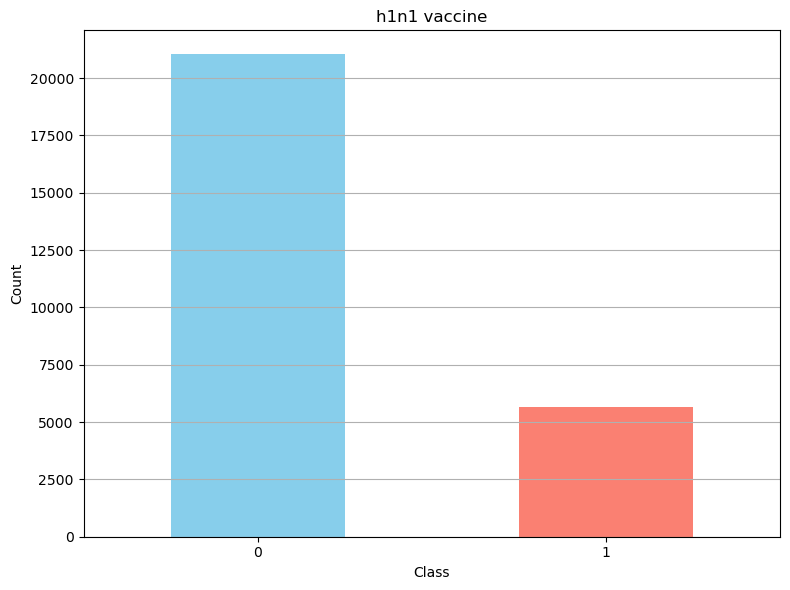

In [63]:
class_counts = y['h1n1_vaccine'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('h1n1 vaccine')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

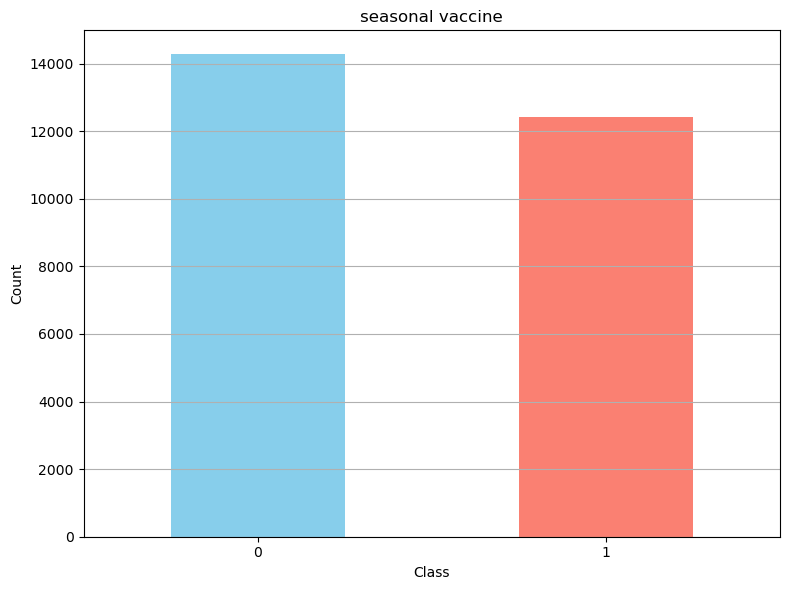

In [64]:
class_counts = y['seasonal_vaccine'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('seasonal vaccine')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### observation
1) Target distribution for h1n1 vaccine is skewed. We will probably have to use techniques like SMOTE to deal with undersampling/oversampling
2) Target distribution for seasonal vaccine is nearly equally distributed.

### 3) Missing value distribution
From the data cleaning part we can see the distribution of missing values in each columns.

### 4) Univariate Analysis

In [65]:
def val_count_df(df, column_name, sort_by_column_name=False):
    value_count = df[column_name].value_counts().reset_index().rename(columns={column_name:"Value Count","index":column_name}).set_index(column_name)
    value_count["Percentage"] = df[column_name].value_counts(normalize=True)*100
    value_count = value_count.reset_index()
    if sort_by_column_name:
        value_count = value_count.sort_values(column_name)
    return value_count

In [66]:
def plot_and_display_valuecounts(df, column_name, sort_by_column_name):
    val_count = val_count_df(df, column_name, sort_by_column_name)
    display(val_count)
    
    val_count.set_index(column_name).plot.pie(y="Value Count", figsize=(5,5), legend=False, ylabel="");
    
    

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 78 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   h1n1_vaccine                          26707 non-null  int64
 1   seasonal_vaccine                      26707 non-null  int64
 2   age_group_35 - 44 Years               26707 non-null  uint8
 3   age_group_45 - 54 Years               26707 non-null  uint8
 4   age_group_55 - 64 Years               26707 non-null  uint8
 5   age_group_65+ Years                   26707 non-null  uint8
 6   education_< 12 Years                  26707 non-null  uint8
 7   education_College Graduate            26707 non-null  uint8
 8   education_Some College                26707 non-null  uint8
 9   race_Hispanic                         26707 non-null  uint8
 10  race_Other or Multiple                26707 non-null  uint8
 11  race_White                            267

##### h1n1 concern
From the below plot we can see that the h1n1 values are equally distributed.

,h1n1_concern,Value Count,Percentage
0,2.0,10667,39.940839
1,1.0,8153,30.527577
2,3.0,4591,17.190250
3,0.0,3296,12.341334


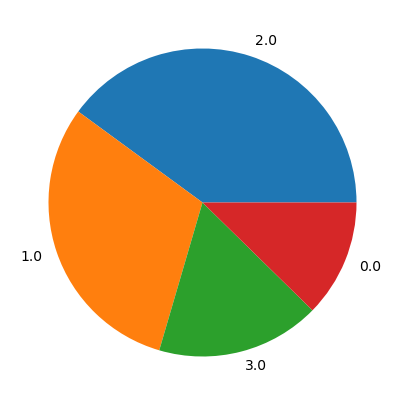

In [68]:
plot_and_display_valuecounts(dataset,"h1n1_concern",False)

##### h1n1 knowledge
Distribution of 0 (no knowledge is very less) which means most people knew about h1n1

,h1n1_knowledge,Value Count,Percentage
0,1.0,14714,55.094170
1,2.0,9487,35.522522
2,0.0,2506,9.383308


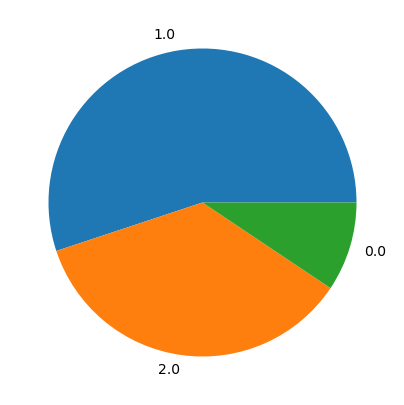

In [69]:
plot_and_display_valuecounts(dataset,"h1n1_knowledge",False)

###  Multivariate Analysis

In [70]:
# !pip install statsmodels

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

### 5) mosaic plot

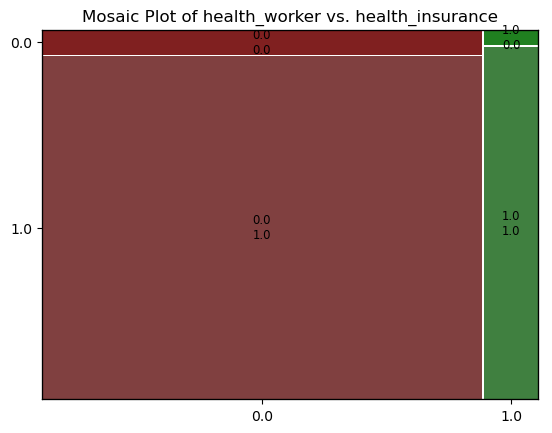

In [72]:
mosaic(dataset, ['health_worker', 'health_insurance'])
plt.title('Mosaic Plot of health_worker vs. health_insurance')
plt.show()

##### observations
1) Almost all health workers (health_worker = 1.0) have health insurance (health_insurance = 1.0).
2) Among those who are not health workers, a vast majority do not have health insurance.

so from this we can conclude that if if remove one of the feature it wont affect the classification as these are corelated and thus this can be used in feature reduction.

### 6) Correlation Analysis with heat map

In [73]:
correlation_matrix = dataset[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'h1n1_vaccine', 'seasonal_vaccine']].corr(method='spearman')

In [74]:
correlation_matrix=correlation_matrix.round(2)

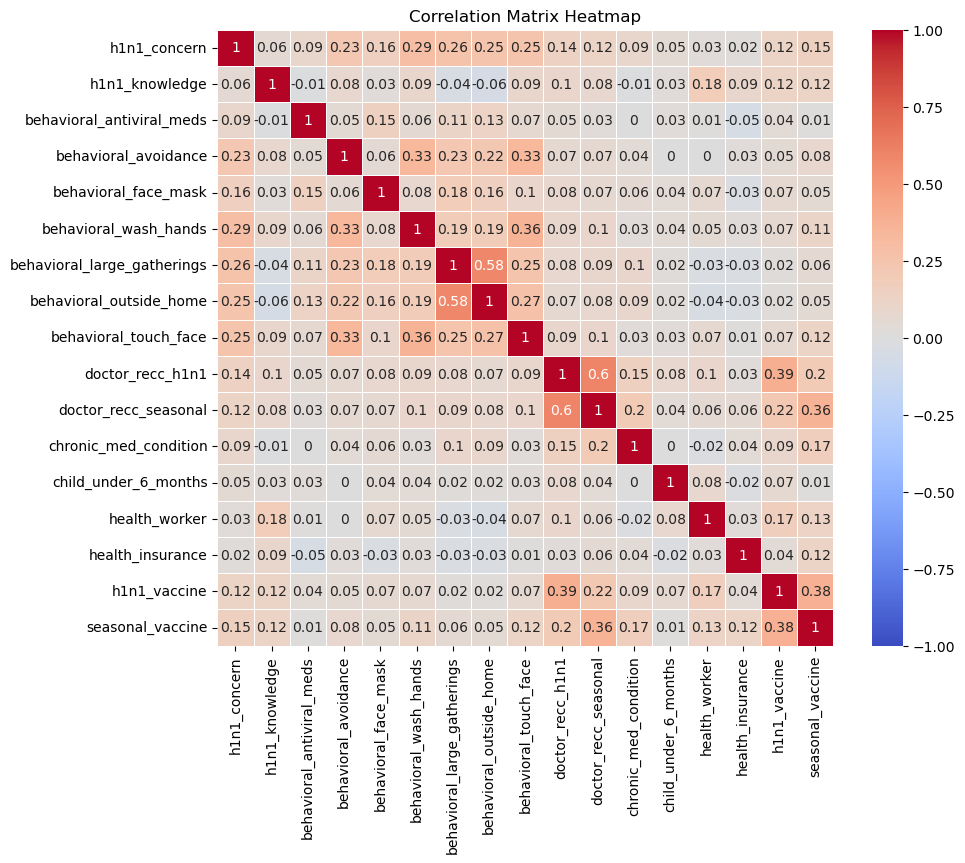

In [75]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix,
            annot=True,       # Display correlation values on heatmap
            cmap='coolwarm',  # Color scheme
            vmin=-1, vmax=1,  # Set colorbar limits
            square=True,      # Make cells square
            linewidths=.5)    # Set linewidth between cells
plt.title("Correlation Matrix Heatmap")
plt.show()

##### observation
As the feature set is huge we will check the numerical features first and check its correlation with the target and among themselves.
Normally we drop those features that are higly correlated among themselves as they have redundant information. From the plot above only doctor_res_Seasonal and doctor_Rec_h1n1 have a consderable correaltion of 0.6. A correlation of >0.8 is considered high

In [76]:
cm1=df[['h1n1_vaccine', 'seasonal_vaccine',
       'age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'race_Hispanic', 'race_Other or Multiple',
       'race_White', 'sex_Male', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty', 'marital_status_Not Married',
       'rent_or_own_Rent', 'employment_status_Not in Labor Force',
       'employment_status_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA']].corr(method='spearman')

In [77]:
cm1 = cm1.round(2)

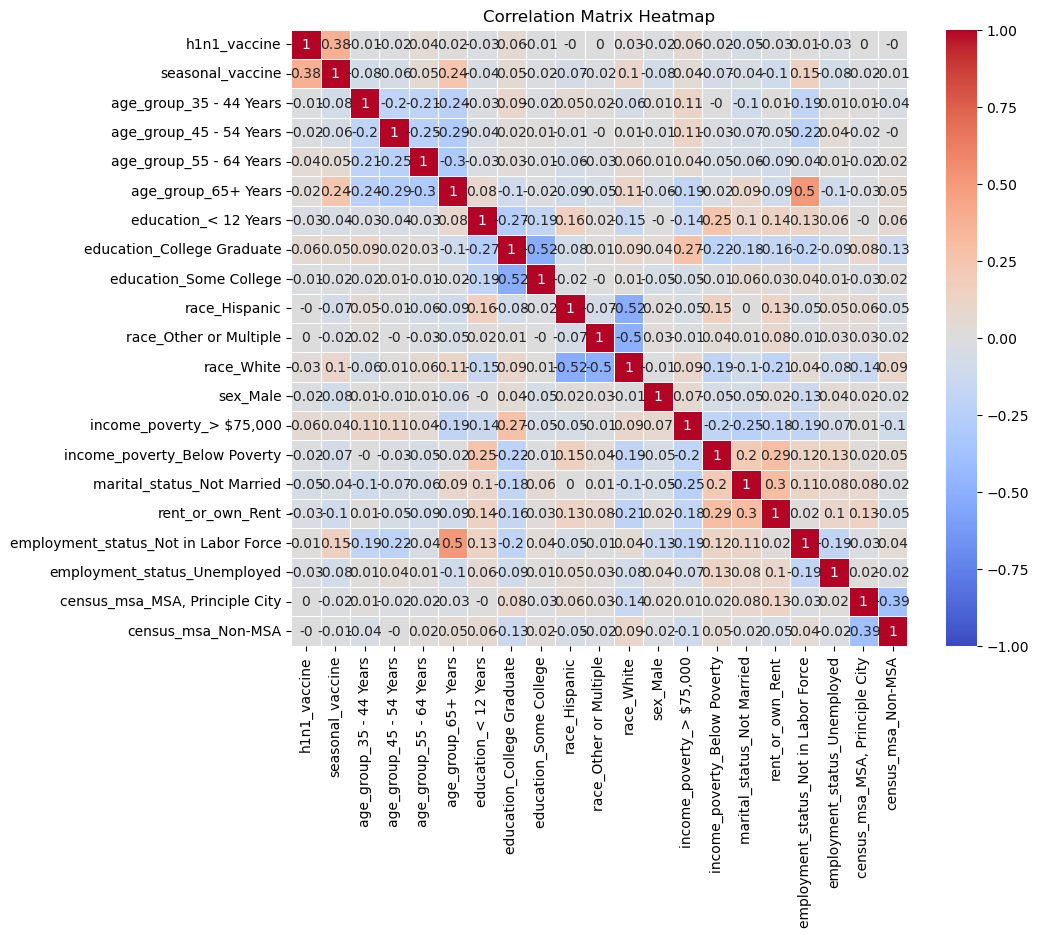

In [78]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(cm1,
            annot=True,       # Display correlation values on heatmap
            cmap='coolwarm',  # Color scheme
            vmin=-1, vmax=1,  # Set colorbar limits
            square=True,      # Make cells square
            linewidths=.5)    # Set linewidth between cells
plt.title("Correlation Matrix Heatmap")
plt.show()

###### observations
There is not a significance correlation among the features.

### 7) Distribution of feature with target

##### h1n1 vaccine and h1n1 concern
Observations:
For the group with the lowest concern (0.0), a higher number of people did not get vaccinated compared to those who did.
As the level of concern increases to 1.0 and 2.0, the number of people who got vaccinated exceeds those who did not.
For the highest concern level (3.0), while more people got vaccinated, there's still a significant portion who chose not to get the vaccine.

In summary, as the level of concern regarding h1n1 increases, the number of people getting vaccinated also seems to increase, although not everyone with high concern opted for vaccination.


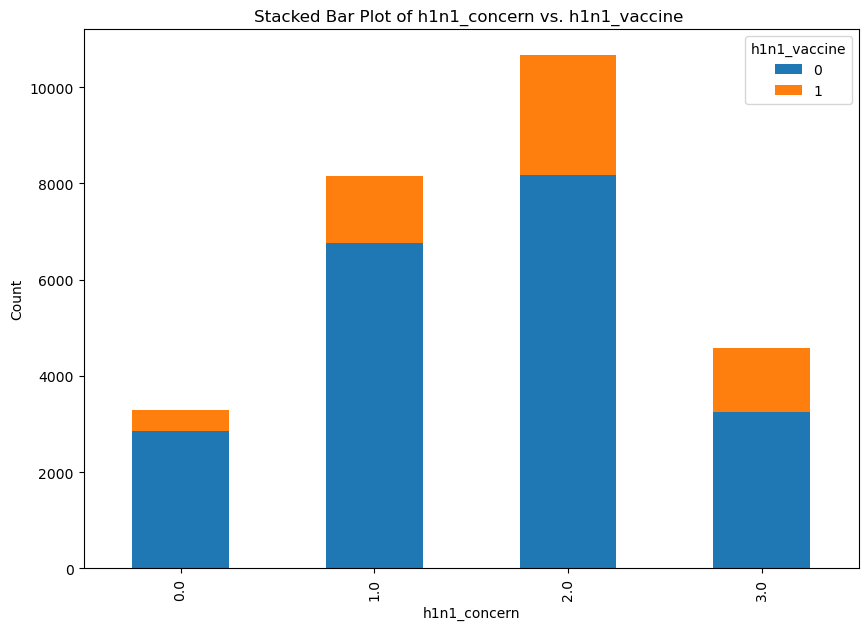

In [79]:
ct = pd.crosstab(dataset['h1n1_concern'], y['h1n1_vaccine'])

# Plotting
ct.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Plot of h1n1_concern vs. h1n1_vaccine ')
plt.ylabel('Count')
plt.xlabel('h1n1_concern')
plt.show()

##### h1n1 knowledge and h1n1 vaccine

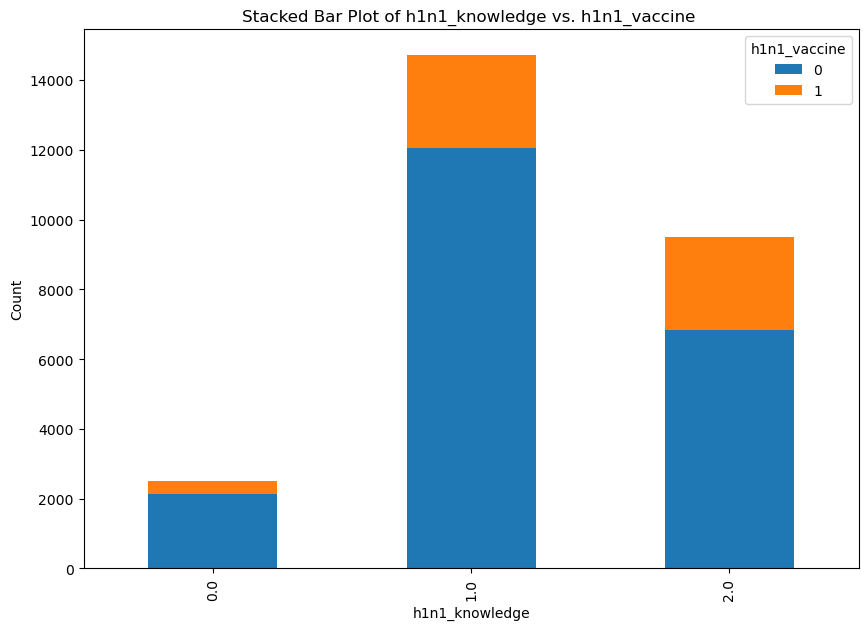

In [80]:
ct = pd.crosstab(dataset['h1n1_knowledge'], y['h1n1_vaccine'])

# Plotting
ct.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Plot of h1n1_knowledge vs. h1n1_vaccine ')
plt.ylabel('Count')
plt.xlabel('h1n1_knowledge')
plt.show()

##### observations
the plot suggests a potential relationship between knowledge about H1N1 and the likelihood of getting vaccinated. As knowledge increases, a larger proportion of people seem to opt for the vaccine.

##### Health worker and seasonal vaccine

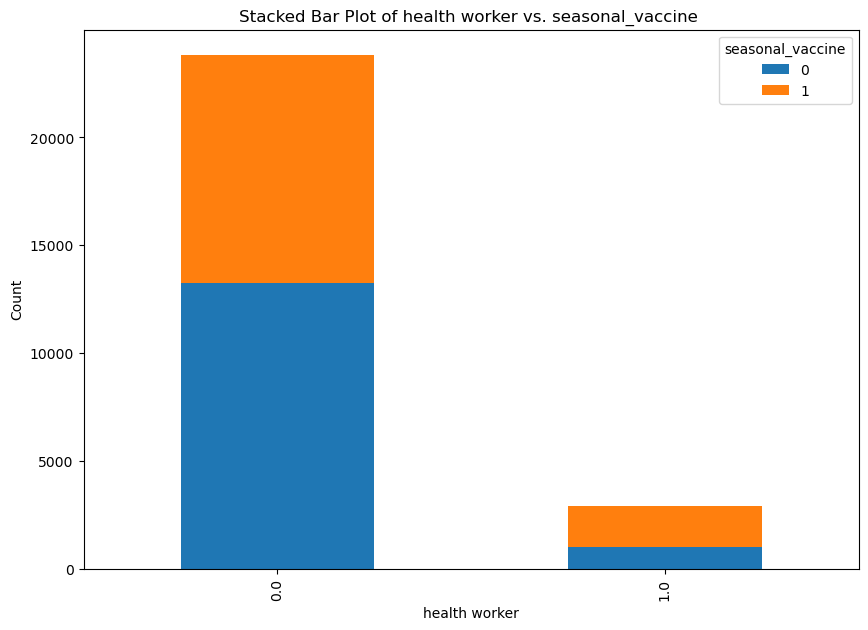

In [81]:
ct = pd.crosstab(dataset['health_worker'], y['seasonal_vaccine'])

# Plotting
ct.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Plot of health worker vs. seasonal_vaccine ')
plt.ylabel('Count')
plt.xlabel('health worker')
plt.show()

##### observations
From the above plot we can see that health workers are vaccinated more as compared to non health workers

##### health insurance vs seasonal and h1n1 vaccine

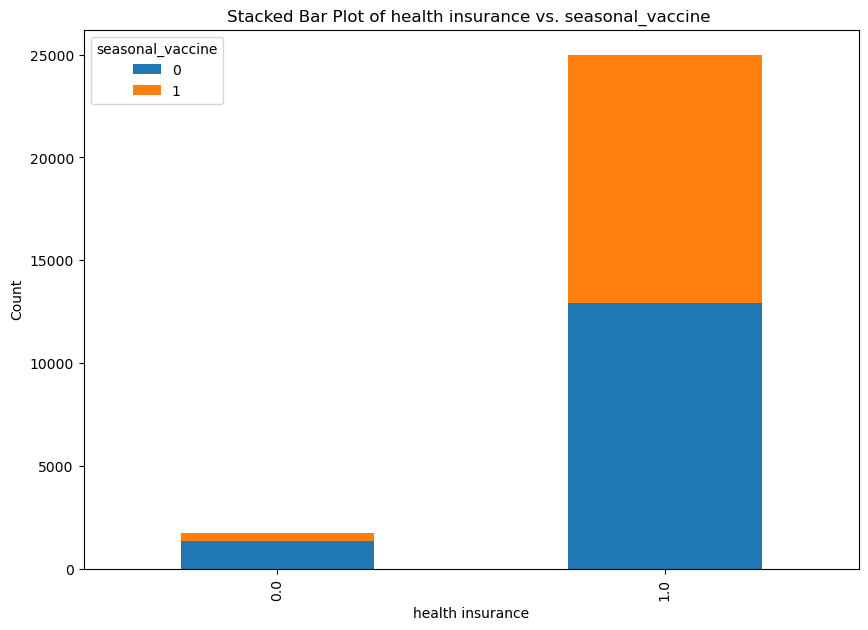

In [82]:
ct = pd.crosstab(dataset['health_insurance'], y['seasonal_vaccine'])

# Plotting
ct.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Plot of health insurance vs. seasonal_vaccine ')
plt.ylabel('Count')
plt.xlabel('health insurance')
plt.show()

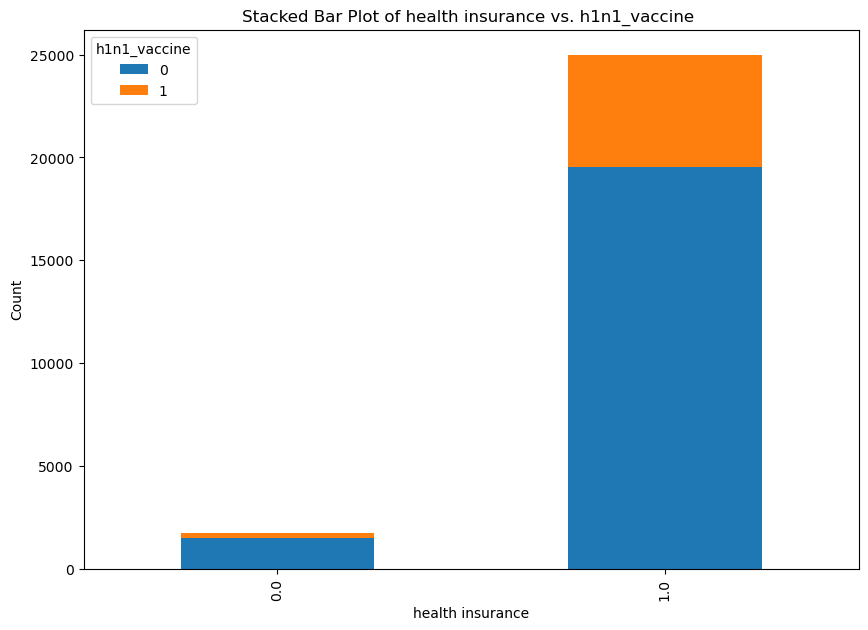

In [83]:
ct = pd.crosstab(dataset['health_insurance'], y['h1n1_vaccine'])

# Plotting
ct.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Stacked Bar Plot of health insurance vs. h1n1_vaccine ')
plt.ylabel('Count')
plt.xlabel('health insurance')
plt.show()

##### observations:
For seasonal vaccine:
people having health insurance are more vaccinated than those who dont have insurance but we can see almost 50-50 distribution for people with health insurance.
For h1n1 vaccine
Number of people with h1n1 vaccine is less as compared to seasonal vaccine for people having health insurance.

##### violin plot 

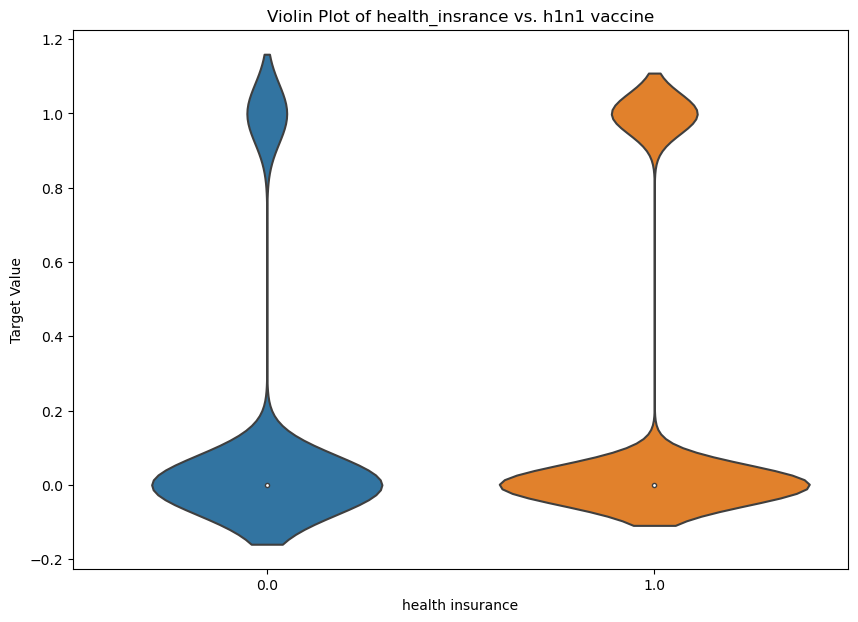

In [84]:
plt.figure(figsize=(10,7))
sns.violinplot(x='health_insurance', y='h1n1_vaccine', data=dataset)
plt.title('Violin Plot of health_insrance vs. h1n1 vaccine')
plt.ylabel('Target Value')
plt.xlabel('health insurance')
plt.show()

##### observation
1) The wide portion at the bottom (around 0) suggests that a significant portion of individuals without health insurance (represented by 0.0 on the x-axis) did not take the h1n1 vaccine.
2) Individuals with health insurance (1.0) are more likely to have taken the h1n1 vaccine than those without health insurance (0.0).
3) The vaccination rate is higher among those with health insurance compared to those without.

-This plot provides a clear visual representation of the relationship between having health insurance and the likelihood of getting the h1n1 vaccine. It's an effective way to communicate that health insurance status appears to be associated with vaccination behavior, at least in this dataset.

### 8) Feature Engineering using top k features
Top 10 features

In [85]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=10)  # Select top 10 features
reduced_data = selector.fit_transform(X, y)


In [86]:
reduced_data

array([[    0,     0,     0, ...,     0,     0,     0],
       [    1,     0,     0, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       ...,
       [26704,     0,     0, ...,     1,     1,     0],
       [26705,     0,     0, ...,     0,     0,     0],
       [26706,     0,     0, ...,     1,     0,     0]], dtype=int64)

In [87]:
feature_names = list(X.columns)

In [88]:
selected_mask = selector.get_support()

# Use the mask to get the selected feature names
selected_features = [feature for (feature, selected) in zip(feature_names, selected_mask) if selected]

In [89]:
selected_features

['respondent_id',
 'doctor_recc_h1n1_1.0',
 'doctor_recc_seasonal_1.0',
 'health_worker_1.0',
 'opinion_h1n1_vacc_effective_5.0',
 'opinion_h1n1_risk_4.0',
 'opinion_h1n1_risk_5.0',
 'opinion_seas_vacc_effective_5.0',
 'opinion_seas_risk_4.0',
 'opinion_seas_risk_5.0']

### 9) PCA

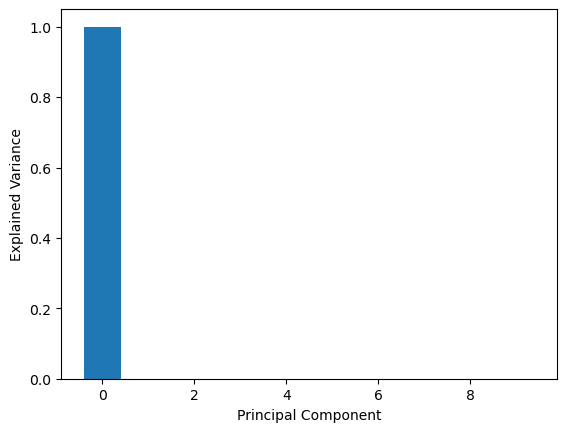

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=10) # for illustration, change n_components as needed
principalComponents = pca.fit_transform(X)

# Visualizing the variance explained by each component
explained_variance = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

###### observation
The pca plot shows a decay in explained variance as we keep on increasing the number of principal components.

### 10) t-sne 

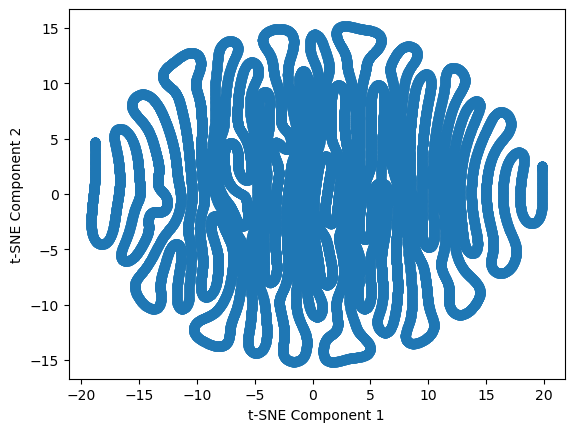

In [91]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(X)

# Visualizing the results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

###### Observation
From the tsne plot it can be inferred that since the data points are densely packed and there's no clear separation between them, it's indicative that the dataset might not have strong inherent clusters (at least in the chosen perplexity and iteration settings of t-SNE)
